# Lab 4: Ohm's Law

# Theory
$$I=\frac{V}{R}$$
If we re-arrange Ohm’s law, we can define the resistance of a material to be
$$R≝\frac{V}{I}\tag{2}$$

If we measure the current, $I$, that flows through a material across which we put different voltages, $V$, notice that the
slope of the $V$ vs. $I$ curve will be the resistance of the material. Therefore, in each of the three experiments to follow,
you will be putting different voltages across the three devices, measuring the current that flows through the device,
and plotting this curve. The slope of this curve will be the resistance of the device.
If the slope of the curve is constant (i.e. it’s a straight line), we call the device ohmic. Otherwise we call the device
non-ohmic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Raw Data

Now that everything is set up, you can take data:

1. **Resistor**
    1. Connect the resistor into the measurement circuit.
    2. Turn on the power supply and DMMs.
    3. You should be able to safely set the DMM measuring current to “40 mA.” Pay attention to the DMM. If it beeps, you must reduce the voltage immediately to protect the DMM.
    4. Rotate the Current knob for the “A” channel fully clockwise. The red LED should go out.
    5. Slowly increase the voltage for channel “A” and record voltages and currents every volt.
    6. Rotate the “A” channel voltage and current knobs fully CCW.
2. **Light Bulb**

    1. Replace the resistor with the light bulb.
    
    2. Set the DMM measuring current to “400 mA.”
    
    3. **Setting the Current Limit:** The Light Bulb can only handle 250 mA of current. The Power Supply can be set to limit the maximum current to this value:
        1. With the Current knob for channel “A” fully CCW, rotate the voltage knob fully clockwise.
        2. Slowly rotate the current knob until the DMM measuring current reads 250 mA. The maximumcurrent is now set. Do not change this knob for the rest of the experiment.
    
    4. Rotate the voltage knob back to zero and take voltage and current data every 0.5 V.
    5. Rotate the “A” channel voltage and current knobs fully CCW.
    3
3. **Diode**
    1. The Diode has a polarity. Look carefully at the diode and locate the white band on one side. Connectthis side to the **negative (black)** side of the power supply.
    2. Setting the Current Limit: This time we must protect the DMM from excessive current.
        1. With the current knob for channel “A” fully CCW, rotate the voltage knob fully clockwise.
        2. **Slowly** rotate the current knob until the DMM measuring current reads 390 mA. The maximum current is now set. Do not change this knob for the rest of the experiment.
    3. Rotate the voltage knob back to zero.
    4. Set the DMM measuring current to “4 mA.” You will need this resolution to determine when the diode “turns on.”
    5. **Slowly** rotate the voltage knob until the DMM measuring current reads 0.001 mA. Record this voltage. This is the “turn-on” voltage.
    6. The Voltage vs. Current curve will look better if you can take many data points. Try to follow the intervals in Table 1 below.
    7. Rotate the voltage knob fully CCW. Turn the diode around so that the white band is on the **positive (red)** side of the power supply.
    8. Take data every 5 volts.

### Table 1: Diode Current Measurements

**Current is between:** | **Try to take data every:**
---|---
0.01-0.1 mA | 0.01 mA
0.1–0.5 mA | 0.1 mA
0.5–5.0 mA | 0.5 mA
5.0–50 mA | 5 mA
50–390 mA | 50 mA

In [2]:
# Create a Pandas DataFrame with data for calibration of Torsion pendulum

# The data elements are [V (V), δV (V), I (mA), δI (mA)]
lightbulb_data = [[0.003, 0.003, 00.7, 0.05],
                 [0.534, 0.003, 64.6, 0.05],
                 [1.000, 0.003, 85.0, 0.05],
                 [1.514, 0.003, 109.8, 0.05],
                 [2.001, 0.003, 125.5, 0.05],
                 [2.486, 0.003, 144.4, 0.05],
                 [2.999, 0.003, 159.4, 0.05],
                 [3.483, 0.003, 174.7, 0.05],
                 [3.995, 0.003, 188.2, 0.05]]

resistor_data  = [[0.006, 0.005, 0.00, 0.01],
                  [0.497, 0.005, 0.04, 0.01],
                  [1.001, 0.005, 0.09, 0.01],
                  [1.493, 0.005, 0.14, 0.01],
                  [2.007, 0.005, 0.19, 0.01],
                  [2.481, 0.005, 0.24, 0.01],
                  [2.995, 0.005, 0.29, 0.01],
                  [3.493, 0.005, 0.34, 0.01],
                  [3.904, 0.005, 0.39, 0.01]]

diode_forward_data_current = [0.001,0.098,0.109,0.116,0.154,0.213,0.307,0.430,0.521,0.987,1.443,2.057,2.497,2.870,3.516,3.419,03.97,04.47,05.01,09.84,15.02,20.07,25.78,30.08,35.13,39.72,045.1,050.8,100.4,150.7,201.9,245.2,299.0,351.0]
diode_forward_data_voltage = [0.311,0.497,0.494,0.501,0.510,0.524,0.541,0.556,0.565,0.596,0.613,0.632,0.642,0.649,0.659,0.651,0.665,0.671,0.673,0.707,0.726,0.740,0.751,0.758,0.765,0.770,0.774,0.780,0.809,0.826,0.839,0.845,0.853,0.859]

diode_reverse_data_current = [0.000, 0.000, 0.000, 0.000, 0.001]
diode_reverse_data_voltage = [-0.042,-5.08,-10.06,-15.08,-20.07]

# create dataframes
df = pd.DataFrame(resistor_data, columns = ['Voltage', 'dVoltage', 'Current_mA', 'dCurrent_mA'])

df2 = pd.DataFrame(lightbulb_data, columns = ['Voltage', 'dVoltage', 'Current_mA', 'dCurrent_mA'])

df3 = pd.DataFrame(diode_forward_data_current, columns = ['Current_mA'])
df3['Voltage'] = diode_forward_data_voltage

df4 = pd.DataFrame(diode_reverse_data_current, columns = ['Current_mA'])
df4['Voltage'] = diode_reverse_data_voltage

print('Raw Data - Resistor')
print(df.to_string(index=False))

print()

print('Raw Data - Light Bulb')
print(df2.to_string(index=False))

print()

print('Raw Data - Diode Forward')
print(df3.to_string(index=False))

print()

print('Raw Data - Diode Reverse')
print(df4.to_string(index=False))



Raw Data - Resistor
 Voltage  dVoltage  Current_mA  dCurrent_mA
   0.006     0.005        0.00         0.01
   0.497     0.005        0.04         0.01
   1.001     0.005        0.09         0.01
   1.493     0.005        0.14         0.01
   2.007     0.005        0.19         0.01
   2.481     0.005        0.24         0.01
   2.995     0.005        0.29         0.01
   3.493     0.005        0.34         0.01
   3.904     0.005        0.39         0.01

Raw Data - Light Bulb
 Voltage  dVoltage  Current_mA  dCurrent_mA
   0.003     0.003         0.7         0.05
   0.534     0.003        64.6         0.05
   1.000     0.003        85.0         0.05
   1.514     0.003       109.8         0.05
   2.001     0.003       125.5         0.05
   2.486     0.003       144.4         0.05
   2.999     0.003       159.4         0.05
   3.483     0.003       174.7         0.05
   3.995     0.003       188.2         0.05

Raw Data - Diode Forward
 Current_mA  Voltage
      0.001    0.311
      0.0

In [3]:
df['Current'] = 0.001*df['Current_mA']
df['dCurrent'] = 0.001*df['dCurrent_mA']

df2['Current'] = 0.001*df2['Current_mA']
df2['dCurrent'] = 0.001*df2['dCurrent_mA']


df3['Current'] = 0.001*df3['Current_mA']
df3['dCurrent'] = 0.0001
df3['dVoltage'] = 0.01

df4['Current'] = 0.001*df4['Current_mA']
df4['dCurrent'] = 0.0001
df4['dVoltage'] = 0.01



print(df.to_string(index=False))

print()

print(df2.to_string(index=False))

print ()

print(df3.to_string(index=False))

print()

print(df4.to_string(index=False))

 Voltage  dVoltage  Current_mA  dCurrent_mA  Current  dCurrent
   0.006     0.005        0.00         0.01  0.00000   0.00001
   0.497     0.005        0.04         0.01  0.00004   0.00001
   1.001     0.005        0.09         0.01  0.00009   0.00001
   1.493     0.005        0.14         0.01  0.00014   0.00001
   2.007     0.005        0.19         0.01  0.00019   0.00001
   2.481     0.005        0.24         0.01  0.00024   0.00001
   2.995     0.005        0.29         0.01  0.00029   0.00001
   3.493     0.005        0.34         0.01  0.00034   0.00001
   3.904     0.005        0.39         0.01  0.00039   0.00001

 Voltage  dVoltage  Current_mA  dCurrent_mA  Current  dCurrent
   0.003     0.003         0.7         0.05   0.0007   0.00005
   0.534     0.003        64.6         0.05   0.0646   0.00005
   1.000     0.003        85.0         0.05   0.0850   0.00005
   1.514     0.003       109.8         0.05   0.1098   0.00005
   2.001     0.003       125.5         0.05   0.1255  

## Part I:  Resistor

The theory here is simple.  The relationship between the measured voltage across the resistor and the current through the resistor is:

$\Delta V = iR$

Thus, if we plot Voltage vs. Current, we expect a linear relationship with a y-intercept of zero and a slope of R.

Beta: [9.98910474e+03 7.73044301e-02]
Beta Std Error: [1.12903002e+02 2.59286758e-02]
Beta Covariance: [[ 6.85344143e+04 -1.30976911e+01]
 [-1.30976911e+01  3.61458465e-03]]
Residual Variance: 0.1859954308907394
Inverse Condition #: 0.0001273405647366959
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (9989.104735398 +/- 112.903002292) X + (0.077304430 +/- 0.025928676)


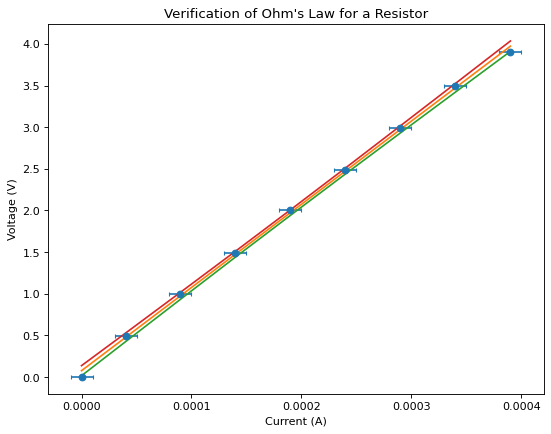

In [4]:
xi = df['Current']
yi = df['Voltage']
sigmaxi = df['dCurrent']
sigmayi = df['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Verification of Ohm\'s Law for a Resistor')
plt.show()

## Analysis of Resistor Result

First of all, we see that this is a very good fit.  The upper and lower error band lines
are barely distinguishable from one another.  This tells us that we are able to determine the voltage for a given current quite accurately!  Cool!

Second, we see that the result for the y-intercept = $(0.06 \pm 0.01)$ Volts, and is not consistent with zero.  This is inconsistent with our expectations. However, the plot does appear to be linear, and the y-intercept is at least close to zero.

Third, we see that slope that we are trying to determine is
$(10063.9 \pm 18.3)$ Volts/Amp, and according to the theory, this should be the resistance value. A Volt/Amp is the same as an $\Omega$.


From measurements using the Ohm-meter setting on the DVM, the resistance was measured
to be $(9.90 \pm 0.01) k\Omega = (9900 \pm 10) \Omega$.

Our measured slope is close to, but inconsistent with this measured value.

## Part II - Light Bulb

At first glance, we might expect that a light bulb behaves like a typical resistor.  So, our first analysis will be the same as in the previous section; we will plot Voltage vs. Current through the light bulb.

Beta: [22.30475806 -0.60625521]
Beta Std Error: [2.11878365 0.27478703]
Beta Covariance: [[ 3.61454663e-04 -4.22620854e-05]
 [-4.22620854e-05  6.07957260e-06]]
Residual Variance: 12419.937105941653
Inverse Condition #: 0.05263233962343614
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (22.304758064 +/- 2.118783655) X + (-0.606255207 +/- 0.274787025)


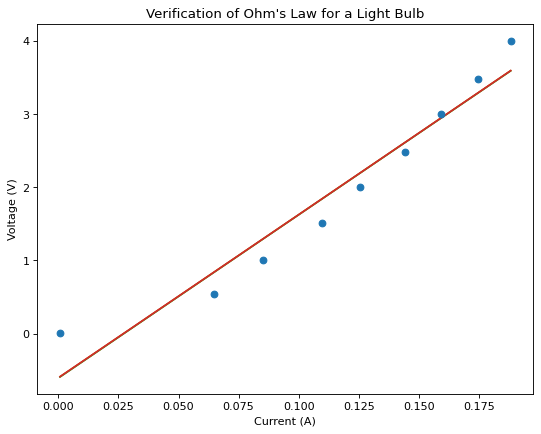

In [5]:
xi = df2['Current']
yi = df2['Voltage']
sigmaxi = df2['dCurrent']
sigmayi = df2['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Verification of Ohm\'s Law for a Light Bulb')
plt.show()

## Analysis of Light-Bulb Result

First of all, we see that this is a NOT a very good fit!!!  It appears that the light bulb does NOT obey Ohm's Law.  Why?  It seems like maybe a quadratic fit might be better, in fact.

Let's try that instead!!  We will learn something really interesting, in fact!

Beta: [ 9.41754805e+01  3.75387627e+00 -2.15230548e-02]
Beta Std Error: [4.92074021 0.97446496 0.04478864]
Beta Covariance: [[ 1.05089019e-01 -1.98702319e-02  5.65255768e-04]
 [-1.98702319e-02  4.12124961e-03 -1.47203991e-04]
 [ 5.65255768e-04 -1.47203991e-04  8.70627268e-06]]
Residual Variance: 230.41117374225396
Inverse Condition #: 0.002983861116996214
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (94.175480472 +/- 4.920740209) X^ + (3.753876272 +/- 0.974464960) X + (-0.021523055 +/- 0.044788643)


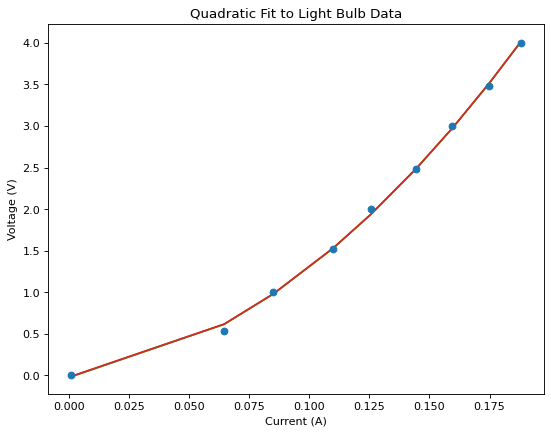

In [6]:
xi = df2['Current']
yi = df2['Voltage']
sigmaxi = df2['dCurrent']
sigmayi = df2['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Quadratic function y = a*x**2 + b*x + c'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x**2 + B[1]*x + B[2]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2., 3.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X^ + (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Quadratic Fit to Light Bulb Data')
plt.show()

So, now this is a much better fit!  The physics effect here is that light-bulbs are actually NON-Ohmic devices.  As the current increases, the temperature of the filament
in the light bulb increases.  This causes the resistance to increase. The resistance is DEFINED to be the slop of V vs. I graph at any point.  Now that we have a nice quadratic fit, we can calculate this slope (and hence the resistance), using:

$V = aI^2 + bI + c$

$R = \frac{dV}{dI} = 2aI + b$

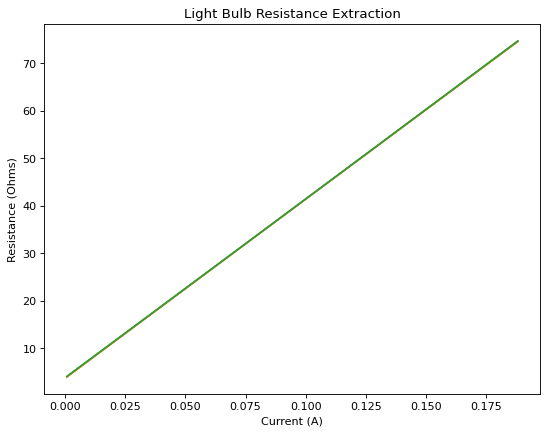

In [7]:
def resistancefunction(B, x):
    '''Resistance function R = 2*a*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return 2*B[0]*x + B[1]

# Construct the Ropt and Rcov arrays
Ropt = [2.0*popt[0],popt[1]]
Rcov = [[pcov[0][0],pcov[0][1]],[pcov[1][0],pcov[1][1]]]

# Sample the resistance function
ps = np.random.multivariate_normal(Ropt,Rcov,10000)
ysample=np.asarray([resistancefunction(pi,xi) for pi in ps])

# Construct the upper, lower, and middle lines
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

# Plot things
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Resistance (Ohms)')
plt.title('Light Bulb Resistance Extraction')
plt.show()


We see from this analysis that the resistance varies from about 30 Ohms at low current to about 70 Ohms at the maximum current used in the experiment.  This generally increasing trend is what we expect from the theory.

## Part III - Diode

For this part of the experiment, we operate the diode in two configurations - forward bias and reverse bias.  For the reverse bias situation, we expect zero current to flow.  For the forward bias situation, the current through the diode is described by:

$I = I_0(e^{\frac{e\Delta V}{\eta k T}} - 1)$

where $I_0$ is the so-called dark saturation current, $e$ is the charge of the electron, $k$ is Boltzmann's constant, $T$ is the temperature, $\Delta V$ is the voltage across the diode, and $\eta$ is an efficiency factor for the diode.  So, clearly, we expect a very non-linear dependence!

If we assume that we are operating at room temperature (293 K), we can calculate that:

$\frac{e}{kT} = \frac{1.6 \times 10^{-19}}{(1.381 \times 10^{-23})(293)} = \frac{1}{0.0253}$

Thus, we have now that:

$I = I_0(e^{\frac{\Delta V}{0.0253 \eta}} - 1)$

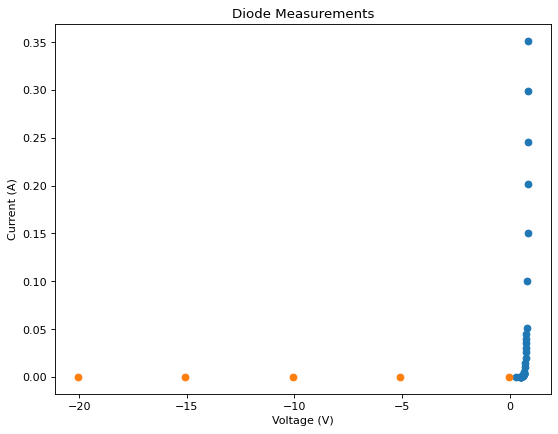

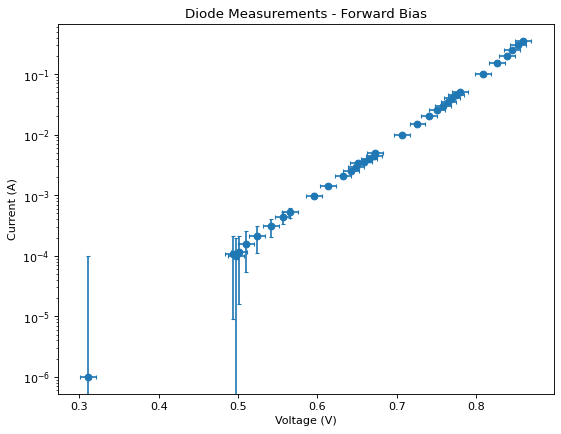

In [8]:
xi1 = df3['Voltage']
yi1 = df3['Current']
sigmaxi1 = df3['dVoltage']
sigmayi1 = df3['dCurrent']

xi2 = df4['Voltage']
yi2 = df4['Current']
sigmaxi2 = df4['dVoltage']
sigmayi2 = df4['dCurrent']

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi1, yi1, xerr=sigmaxi1, yerr=sigmayi1, fmt='o', capsize=2, capthick=1)
plt.errorbar(xi2, yi2, xerr=sigmaxi2, yerr=sigmayi2, fmt='o', capsize=2, capthick=1)

#########################

plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Diode Measurements')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi1, yi1, xerr=sigmaxi1, yerr=sigmayi1, fmt='o', capsize=2, capthick=1)

#########################

plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Diode Measurements - Forward Bias')
#plt.xlim(0.3,1.0)
plt.yscale('log')
plt.show()





Beta: [1.79842588e-09 2.20525244e+01]
Beta Std Error: [1.94592515e-10 1.49108737e-01]
Beta Covariance: [[ 3.94777661e-19 -3.00194896e-10]
 [-3.00194896e-10  2.31796294e-01]]
Residual Variance: 0.09591790723706152
Inverse Condition #: 0.00644123431921978
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (1.798425880e-09 +/- 1.945925155e-10) e^(2.205252445e+01 +/- 1.491087369e-01)


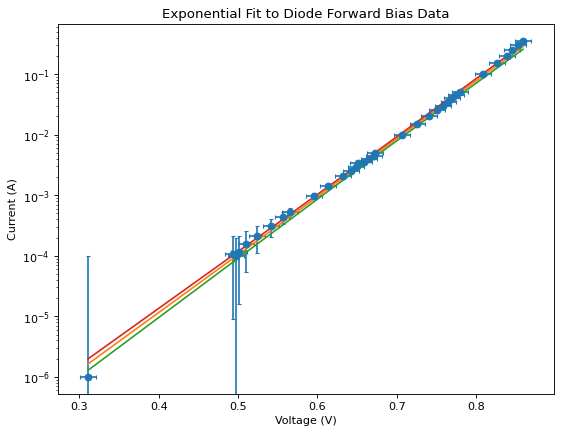

In [9]:
yi = df3['Current']
xi = df3['Voltage']
sigmayi = df3['dCurrent']
sigmaxi = df3['dVoltage']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Exponential Function - y = A(e^(kV) - 1)'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*(np.exp(B[1]*x) - 1.0)

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1.6E-9, 22.4,]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9e +/- %0.9e) e^(%0.9e +/- %0.9e)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Exponential Fit to Diode Forward Bias Data')
plt.yscale('log')
plt.show()

In [10]:
k = popt[1]
dk = perr[1]

eta = 1.0/(0.0253*k)
deta = eta*(dk/k)

print ('eta = (%0.2f +/- %0.2f)' % (eta,deta))

eta = (1.79 +/- 0.01)


https://www.electrical4u.com/diode-current-equation/

As can be seen at the link above, for an ideal diode, we expect $\eta = 1$.  For silicon diodes, we expect $\eta \approx 2$.